###                                                 PROJECT 2 CREDIT CARD RISK DEFAULT

#### Summary
Credit cards are a major source of revenue for banks but also carry significant credit risk due to customer defaults. Since credit card behavior changes over time, financial institutions use data analytics and machine learning to analyze payment patterns, spending behavior, and repayment discipline. Accurate default prediction enables proactive risk management and more informed credit decisions.

In [107]:
pip install scikit-learn

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
df = pd.read_excel(
    "C:/Users/Administrator/Downloads/default+of+credit+card+clients/default of credit card clients.xlsx", skiprows=1, header=0, index_col=0)
#File Uploading

In [110]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


For Cleaning of data where bill collection amount is in negative

In [115]:
bill_cols = [c for c in df.columns if c.startswith('BILL_AMT')]

In [116]:
(df[bill_cols] < 0).sum()

BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

In [117]:
df[bill_cols] = df[bill_cols].abs()

In [118]:
(df[bill_cols] < 0).sum()

BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
dtype: int64

For Cleaning of data where Education data is replace for meaningful insight

In [119]:
df['EDUCATION'].replace(0.0, np.nan,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24040\3330813482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].replace(0.0, np.nan,inplace=True)


In [120]:
df['EDUCATION'].replace([1.0,2.0,3.0,4.0,5.0,6.0], ["Post Graduate Degree", "Graduate Degree","High School","Other","Other","Other"], inplace=True)

In [121]:
df['EDUCATION'].replace([1.0,2.0,3.0,4.0,5.0,6.0], ["Post Graduate Degree", "Graduate Degree","High School","Other","Other","Other"], inplace=True)

In [122]:
df.EDUCATION.value_counts()

EDUCATION
Graduate Degree         14030
Post Graduate Degree    10585
High School              4917
Other                     454
Name: count, dtype: int64

For Cleaning of data where Sex data is replace for meaningful insight

In [123]:
df['SEX'].replace([1.0,2.0], ["Male","Female"], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24040\2848537996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEX'].replace([1.0,2.0], ["Male","Female"], inplace=True)


In [124]:
df.SEX.value_counts()

SEX
Female    18112
Male      11888
Name: count, dtype: int64

For Cleaning of data where Marriage data is replace for meaningful insight

In [125]:
df['MARRIAGE'].replace(0.0, np.nan,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24040\365980222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].replace(0.0, np.nan,inplace=True)


In [126]:
df['MARRIAGE'].replace([1.0,2.0,3.0],["Single","Married","Divorce"], inplace=True)

In [127]:
df.MARRIAGE.value_counts()

MARRIAGE
Married    15964
Single     13659
Divorce      323
Name: count, dtype: int64

For Cleaning of Column of Payment where Payment data is replace for meaningful insight

In [128]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df[pay_cols] = df[pay_cols].replace([0,1,2,3,4,5,6,7,8,-1,-2],['Paid on Time', 'Payment delayed by 1 month', 'Payment delayed by 2 months', 'Payment delayed by 3 months','Payment delayed by 4 months','Payment delayed by 5 month', 'Payment delayed by 6 months', 'Payment delayed by 7 months','Payment delayed by 8 months','Paid in full','No consumption / No bill / Not using credit card'])

In [129]:
df.isnull().sum()

LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
dtype: int64

In [130]:
df.rename(columns={'PAY_0':'PAYMENT MONTH 1','PAY_2':'PAYMENT MONTH 2','PAY_3':'PAYMENT MONTH 3','PAY_4':'PAYMENT MONTH 4','PAY_5':'PAYMENT MONTH 5','PAY_6':'PAYMENT MONTH 6'}, inplace=True)
df.isnull().sum()

LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAYMENT MONTH 1                0
PAYMENT MONTH 2                0
PAYMENT MONTH 3                0
PAYMENT MONTH 4                0
PAYMENT MONTH 5                0
PAYMENT MONTH 6                0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
dtype: int64

For Cleaning of Column of Bill where Bill data is replace for meaningful insight

In [131]:
df.rename(columns={'BILL_AMT1':'BILL AMOUNT MONTH 1','BILL_AMT2':'BILL AMOUNT MONTH 2','BILL_AMT3':'BILL AMOUNT MONTH 3','BILL_AMT4':'BILL AMOUNT MONTH 4','BILL_AMT5':'BILL AMOUNT MONTH 5','BILL_AMT6':'BILL AMOUNT MONTH 6'}, inplace=True)
df.isnull().sum()

LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAYMENT MONTH 1                0
PAYMENT MONTH 2                0
PAYMENT MONTH 3                0
PAYMENT MONTH 4                0
PAYMENT MONTH 5                0
PAYMENT MONTH 6                0
BILL AMOUNT MONTH 1            0
BILL AMOUNT MONTH 2            0
BILL AMOUNT MONTH 3            0
BILL AMOUNT MONTH 4            0
BILL AMOUNT MONTH 5            0
BILL AMOUNT MONTH 6            0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
dtype: int64

For Cleaning of Column of Total Payment Amount Charge where Total Payment Amount Charge data is replace for meaningful insight

In [132]:
df.rename(columns={'PAY_AMT1':'PAY AMOUNT MONTH 1','PAY_AMT2':'PAY AMOUNT MONTH 2','PAY_AMT3':'PAY AMOUNT MONTH 3','PAY_AMT4':'PAY AMOUNT MONTH 4','PAY_AMT5':'PAY AMOUNT MONTH 5','PAY_AMT6':'PAY AMOUNT MONTH 6'}, inplace=True)
df.isnull().sum()

LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAYMENT MONTH 1                0
PAYMENT MONTH 2                0
PAYMENT MONTH 3                0
PAYMENT MONTH 4                0
PAYMENT MONTH 5                0
PAYMENT MONTH 6                0
BILL AMOUNT MONTH 1            0
BILL AMOUNT MONTH 2            0
BILL AMOUNT MONTH 3            0
BILL AMOUNT MONTH 4            0
BILL AMOUNT MONTH 5            0
BILL AMOUNT MONTH 6            0
PAY AMOUNT MONTH 1             0
PAY AMOUNT MONTH 2             0
PAY AMOUNT MONTH 3             0
PAY AMOUNT MONTH 4             0
PAY AMOUNT MONTH 5             0
PAY AMOUNT MONTH 6             0
default payment next month     0
dtype: int64

In [133]:
df.rename(columns={'LIMIT_BAL':'LIMIT BALANCE'}, inplace=True)
df.isnull().sum()

LIMIT BALANCE                  0
SEX                            0
EDUCATION                     14
MARRIAGE                      54
AGE                            0
PAYMENT MONTH 1                0
PAYMENT MONTH 2                0
PAYMENT MONTH 3                0
PAYMENT MONTH 4                0
PAYMENT MONTH 5                0
PAYMENT MONTH 6                0
BILL AMOUNT MONTH 1            0
BILL AMOUNT MONTH 2            0
BILL AMOUNT MONTH 3            0
BILL AMOUNT MONTH 4            0
BILL AMOUNT MONTH 5            0
BILL AMOUNT MONTH 6            0
PAY AMOUNT MONTH 1             0
PAY AMOUNT MONTH 2             0
PAY AMOUNT MONTH 3             0
PAY AMOUNT MONTH 4             0
PAY AMOUNT MONTH 5             0
PAY AMOUNT MONTH 6             0
default payment next month     0
dtype: int64

To Capitalize the Name of All Column

In [134]:
df.columns = df.columns.str.upper()

For Cleaning of Column of Education and Marriage where Total Payment Amount Charge data is to replace nan data for meaningful insight

In [135]:
df['EDUCATION'].fillna("Unknown",inplace=True) # To mark as unknown as it is difficult classify the same
df['MARRIAGE'].fillna("Unknown",inplace=True)
df.isnull().sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24040\561924116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].fillna("Unknown",inplace=True) # To mark as unknown as it is difficult classify the same
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24040\561924116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate ob

LIMIT BALANCE                 0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAYMENT MONTH 1               0
PAYMENT MONTH 2               0
PAYMENT MONTH 3               0
PAYMENT MONTH 4               0
PAYMENT MONTH 5               0
PAYMENT MONTH 6               0
BILL AMOUNT MONTH 1           0
BILL AMOUNT MONTH 2           0
BILL AMOUNT MONTH 3           0
BILL AMOUNT MONTH 4           0
BILL AMOUNT MONTH 5           0
BILL AMOUNT MONTH 6           0
PAY AMOUNT MONTH 1            0
PAY AMOUNT MONTH 2            0
PAY AMOUNT MONTH 3            0
PAY AMOUNT MONTH 4            0
PAY AMOUNT MONTH 5            0
PAY AMOUNT MONTH 6            0
DEFAULT PAYMENT NEXT MONTH    0
dtype: int64

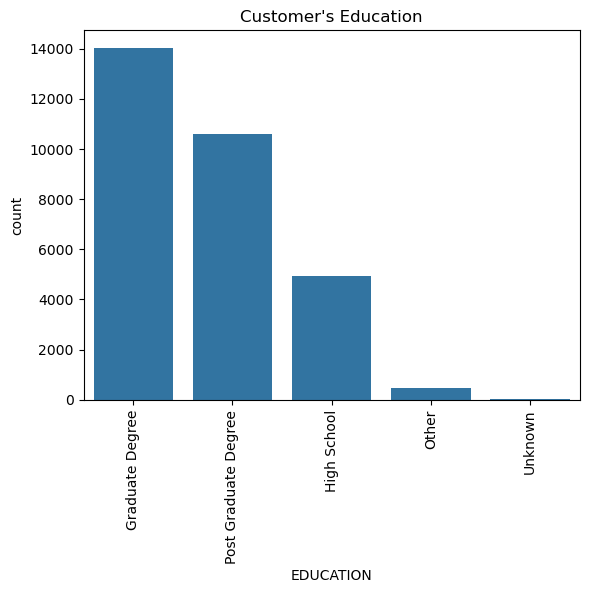

In [136]:
#plt.figure(figsize=(8,5))  # To Determine Customer level of education to whom have avail the credit card
sns.countplot(x='EDUCATION', data=df)
plt.xticks(rotation=90)
plt.title("Customer's Education")
plt.show()

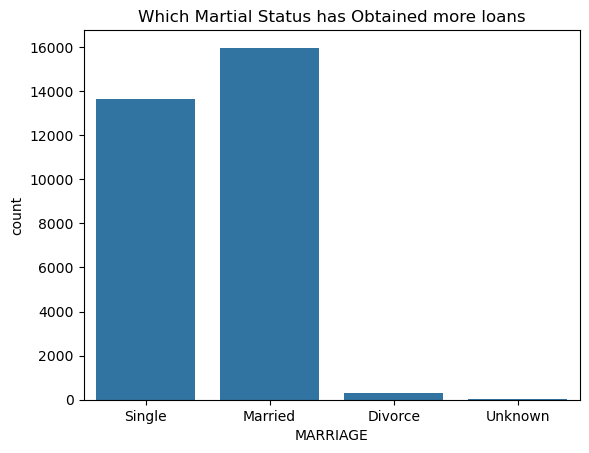

In [137]:
#plt.figure(figsize=(8,5))
df['EDUCATION'].fillna("Unknown",inplace=True) # To Determine martial status to whom have avail the credit card
sns.countplot(x='MARRIAGE', data=df) 
plt.title("Which Martial Status has Obtained more loans")
plt.show()

In [144]:
df.sort_values(by='LIMIT BALANCE', ascending=False).head(5)

,LIMIT BALANCE,SEX,EDUCATION,MARRIAGE,AGE,PAYMENT MONTH 1,PAYMENT MONTH 2,PAYMENT MONTH 3,PAYMENT MONTH 4,PAYMENT MONTH 5,...,BILL AMOUNT MONTH 4,BILL AMOUNT MONTH 5,BILL AMOUNT MONTH 6,PAY AMOUNT MONTH 1,PAY AMOUNT MONTH 2,PAY AMOUNT MONTH 3,PAY AMOUNT MONTH 4,PAY AMOUNT MONTH 5,PAY AMOUNT MONTH 6,DEFAULT PAYMENT NEXT MONTH
ID,,,,,,,,,,,,,,,,,,,,,
2198,1000000,Female,Post Graduate Degree,Single,47,Paid on Time,Paid on Time,Paid on Time,Paid in full,Paid on Time,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0
14920,800000,Male,Graduate Degree,Single,53,Paid in full,Paid in full,Paid in full,Paid on Time,Paid on Time,...,40814,12590,9339,11145,64657,131,247,9366,63482,0
18007,800000,Male,Post Graduate Degree,Married,46,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,Paid in full,Paid in full,...,6193,1957,3175,4644,3832,6219,1961,3183,27201,0
24321,780000,Male,Post Graduate Degree,Single,48,Paid on Time,Paid on Time,Paid on Time,Paid on Time,Paid on Time,...,195124,184872,191090,10000,15004,10000,8000,10028,7003,0
28716,780000,Female,Graduate Degree,Married,41,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,No consumption / No bill / Not using credit card,...,21482,72628,182792,62819,39558,22204,82097,184322,25695,0


In [145]:
df.iloc[24321, :]

LIMIT BALANCE                               420000
SEX                                           Male
EDUCATION                     Post Graduate Degree
MARRIAGE                                   Married
AGE                                             35
PAYMENT MONTH 1                       Paid on Time
PAYMENT MONTH 2                       Paid on Time
PAYMENT MONTH 3                       Paid on Time
PAYMENT MONTH 4                       Paid on Time
PAYMENT MONTH 5                       Paid on Time
PAYMENT MONTH 6                       Paid on Time
BILL AMOUNT MONTH 1                         413076
BILL AMOUNT MONTH 2                         414013
BILL AMOUNT MONTH 3                         417086
BILL AMOUNT MONTH 4                         348345
BILL AMOUNT MONTH 5                         287150
BILL AMOUNT MONTH 6                         261219
PAY AMOUNT MONTH 1                           15048
PAY AMOUNT MONTH 2                           16078
PAY AMOUNT MONTH 3             

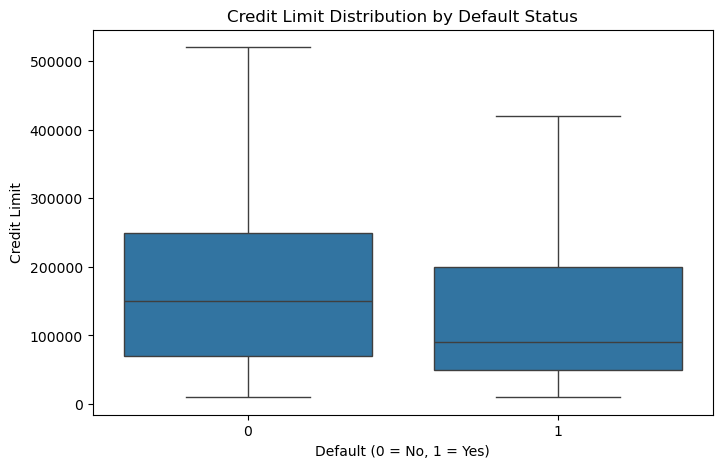

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    x='DEFAULT PAYMENT NEXT MONTH',
    y='LIMIT BALANCE',
    data=df,
    showfliers=False
)

plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit')
plt.show()


### Business Questions

#### 1.How prevalent is credit card default among customers?
#### 2. Does education level reduce credit risk?
#### 3. Does gender reduce credit risk?
#### 4. Does customer age influence the likelihood of default?
#### 5. Are married customers less likely to default than single customers?
#### 6. How strongly does recent payment behavior predict default?
#### 7. Does repeated delinquency increase default probability?
#### 8. Is credit card inactivity a risk signal?
#### 9. What is the spending distribution of customers?
#### 10. Which features are most strongly related to default?

##### 1. Credit card default is moderately prevalent, with approximately 20–25% of customers defaulting in the following month. Default is a significant business problem, justifying predictive modeling and proactive risk management strategies.

In [139]:
df['DEFAULT PAYMENT NEXT MONTH'].value_counts(normalize=True)

DEFAULT PAYMENT NEXT MONTH
0    0.7788
1    0.2212
Name: proportion, dtype: float64

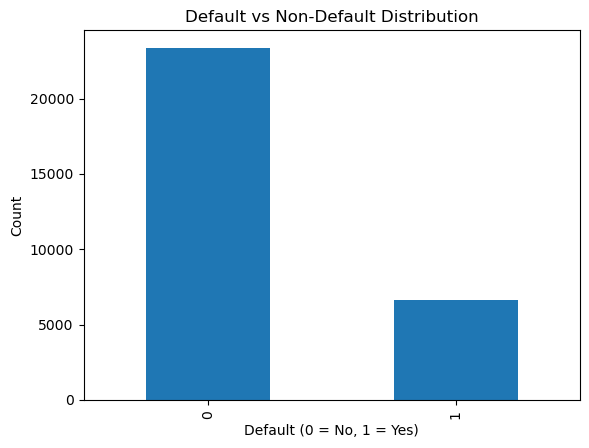

In [140]:
df['DEFAULT PAYMENT NEXT MONTH'].value_counts().plot(  # To Determine default rate of credit card customer
    kind='bar'
)
plt.title('Default vs Non-Default Distribution')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

##### 2. Yes. Customers with higher education levels (graduate and postgraduate) show lower default rates compared to those with high school or other education levels. Education acts as a proxy for income stability and financial literacy, making it a valuable risk indicator.

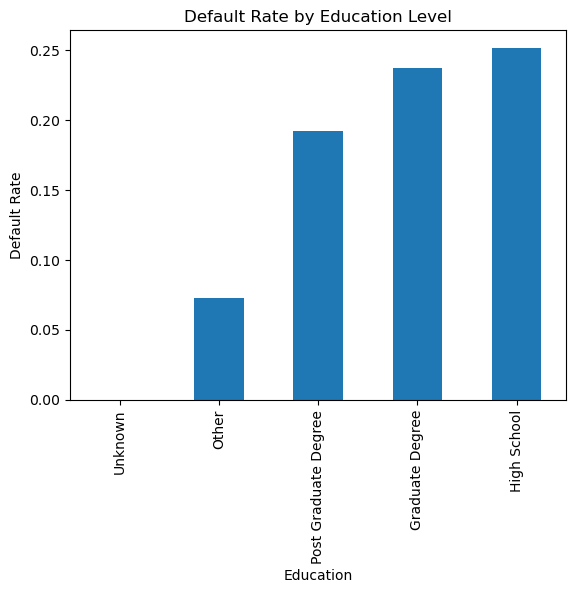

In [141]:
edu_default = (
    df.groupby('EDUCATION')['DEFAULT PAYMENT NEXT MONTH']
    .mean()
    .sort_values()
)

edu_default.plot(kind='bar')
plt.title('Default Rate by Education Level')
plt.ylabel('Default Rate')
plt.xlabel('Education')
plt.show()

##### 3. Yes. Male Customers show higher default rates compared to Female Customer deafult risk. Male customers use cards more aggressively and finance discretionary spending while Female Customers More consistent payment patterns and lower volatility in repayment

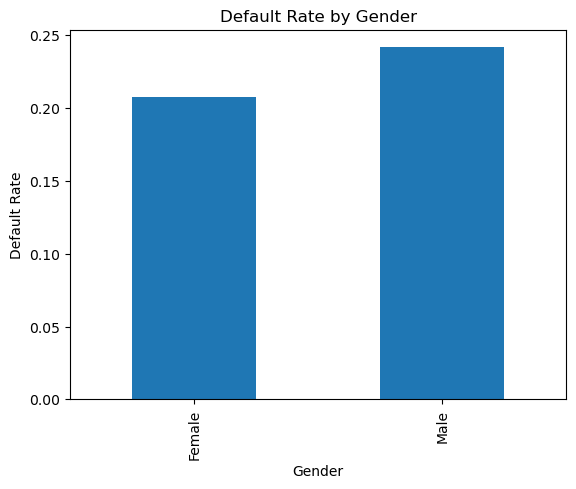

In [143]:
gen_default = (
    df.groupby('SEX')['DEFAULT PAYMENT NEXT MONTH']
    .mean()
    .sort_values()
)

gen_default.plot(kind='bar')
plt.title('Default Rate by Gender')
plt.ylabel('Default Rate')
plt.xlabel('Gender')
plt.show()

##### 4. Yes. Younger customers exhibit higher default rates, while default risk decreases with age and stabilizes among middle-aged customers. Age reflects financial maturity and income stability, which lowers credit risk over time.

In [42]:
def age_group(Age):
    if Age < 18:
        return 'Child'
    elif Age >= 18 and Age < 30: 
        return 'Young Adult'
    elif Age >= 30 and  Age < 50:
        return 'Adult'
    else:
        return 'Seniors'

In [43]:
df['AGE GROUP'] = df['AGE'].apply(age_group)

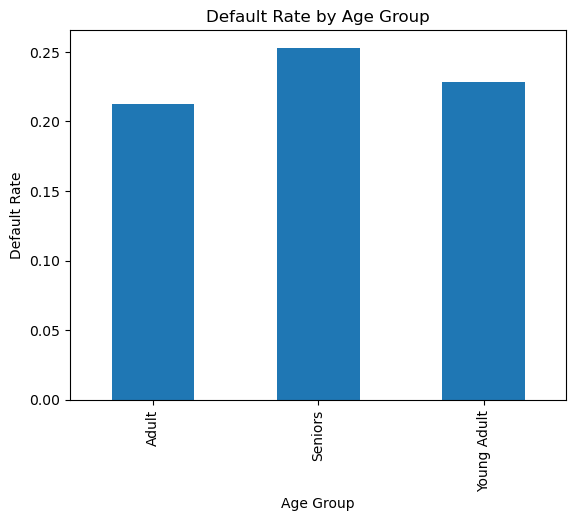

In [44]:
age_default = df.groupby('AGE GROUP')['DEFAULT PAYMENT NEXT MONTH'].mean()

age_default.plot(kind='bar')
plt.title('Default Rate by Age Group')
plt.ylabel('Default Rate')
plt.xlabel('Age Group')
plt.show()

#### 5. Yes. Married customers have lower default rates compared to single customers. Marriage may indicate shared financial responsibility and greater stability, reducing default risk.

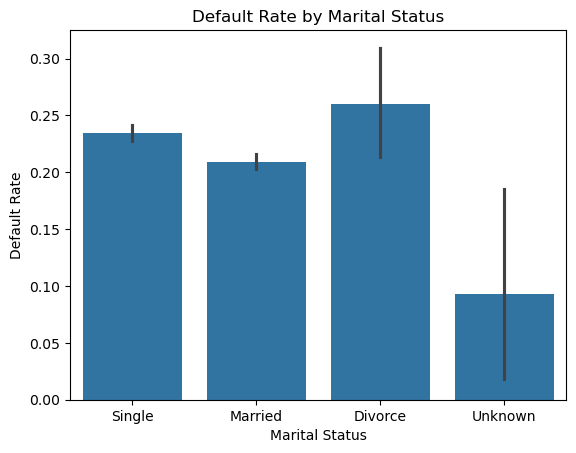

In [45]:
sns.barplot(
    x='MARRIAGE',
    y='DEFAULT PAYMENT NEXT MONTH',
    data=df,
    estimator=np.mean
)
plt.title('Default Rate by Marital Status')
plt.ylabel('Default Rate')
plt.xlabel('Marital Status')
plt.show()

#### 6. Recent payment behavior is the strongest predictor of default. Customers with recent payment delays show a sharp increase in default probability. Monitoring the most recent payment status is critical for early risk detection and intervention.

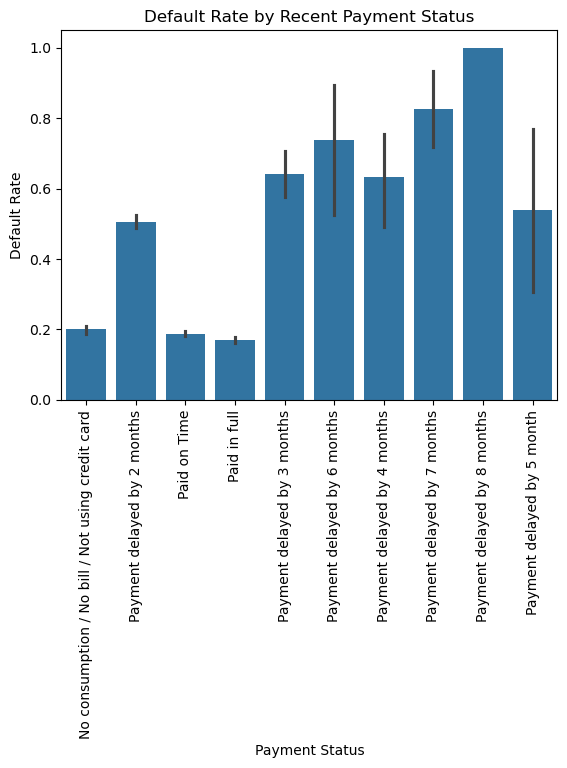

In [103]:
sns.barplot(
    x='PAYMENT MONTH 6',
    y='DEFAULT PAYMENT NEXT MONTH',
    data=df,
    estimator=np.mean
)
plt.title('Default Rate by Recent Payment Status')
plt.ylabel('Default Rate')
plt.xlabel('Payment Status')
plt.xticks(rotation=90)
plt.show()

##### 7. Yes. Default probability increases significantly after multiple delayed payments, particularly after two or more delinquent months. Repeated delinquency signals chronic financial stress, warranting early intervention.

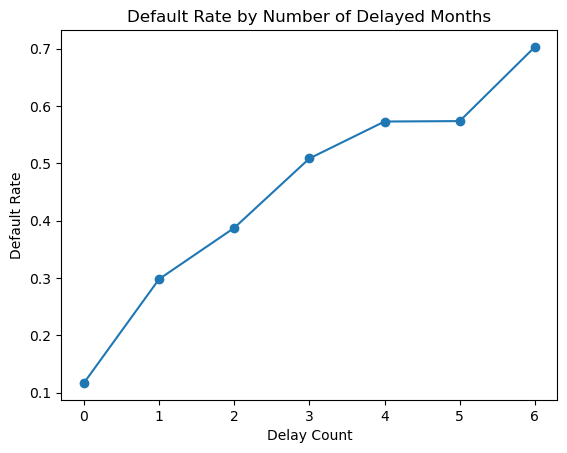

In [48]:
delay_default = df.groupby('DELAY COUNT')['DEFAULT PAYMENT NEXT MONTH'].mean()

delay_default.plot(marker='o')
plt.title('Default Rate by Number of Delayed Months')
plt.ylabel('Default Rate')
plt.xlabel('Delay Count')
plt.show()

##### 8. Inactivity alone is not a strong risk indicator. Many inactive customers remain low risk if they maintain stable payments. Inactivity should be evaluated in combination with payment behavior, not in isolation.

In [49]:
pay_cols = ['PAYMENT MONTH 1','PAYMENT MONTH 2','PAYMENT MONTH 3','PAYMENT MONTH 4','PAYMENT MONTH 5','PAYMENT MONTH 6']

In [50]:
df['INACTIVE MONTHS'] = (df[pay_cols] == -2).sum(axis=1)

In [51]:
df.groupby('INACTIVE MONTHS')['DEFAULT PAYMENT NEXT MONTH'].mean()

INACTIVE MONTHS
0    0.2212
Name: DEFAULT PAYMENT NEXT MONTH, dtype: float64

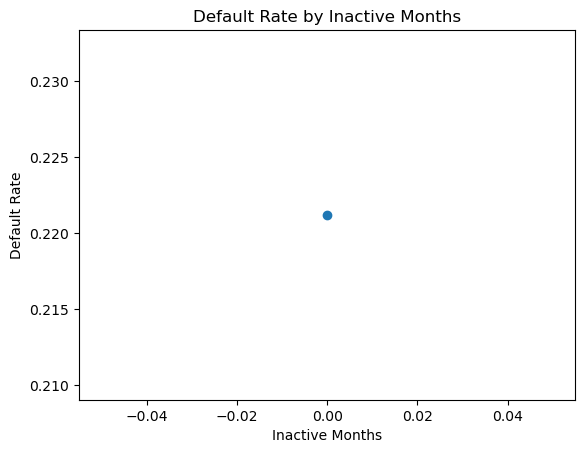

In [52]:
df.groupby('INACTIVE MONTHS')['DEFAULT PAYMENT NEXT MONTH'].mean().plot(marker='o')
plt.title('Default Rate by Inactive Months')
plt.ylabel('Default Rate')
plt.xlabel('Inactive Months')
plt.show()

##### 9.Customer spending is right-skewed, with most customers having low-to-moderate bill amounts and a smaller group carrying very high balances.High balances combined with insufficient payments may indicate financial distress, increasing default risk

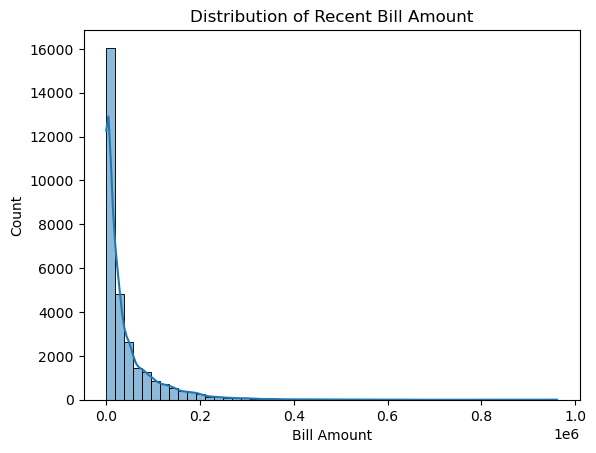

In [54]:
sns.histplot(df['BILL AMOUNT MONTH 6'], bins=50, kde=True)
plt.title('Distribution of Recent Bill Amount')
plt.xlabel('Bill Amount')
plt.show()

##### 10. Answer: The most influential features are: Recent payment status Number of delayed payments Payment-to-bill ratio Total bill amount Demographic variables (age, education, marriage) play a secondary role. Behavioral variables dominate demographic factors in predicting credit card default.

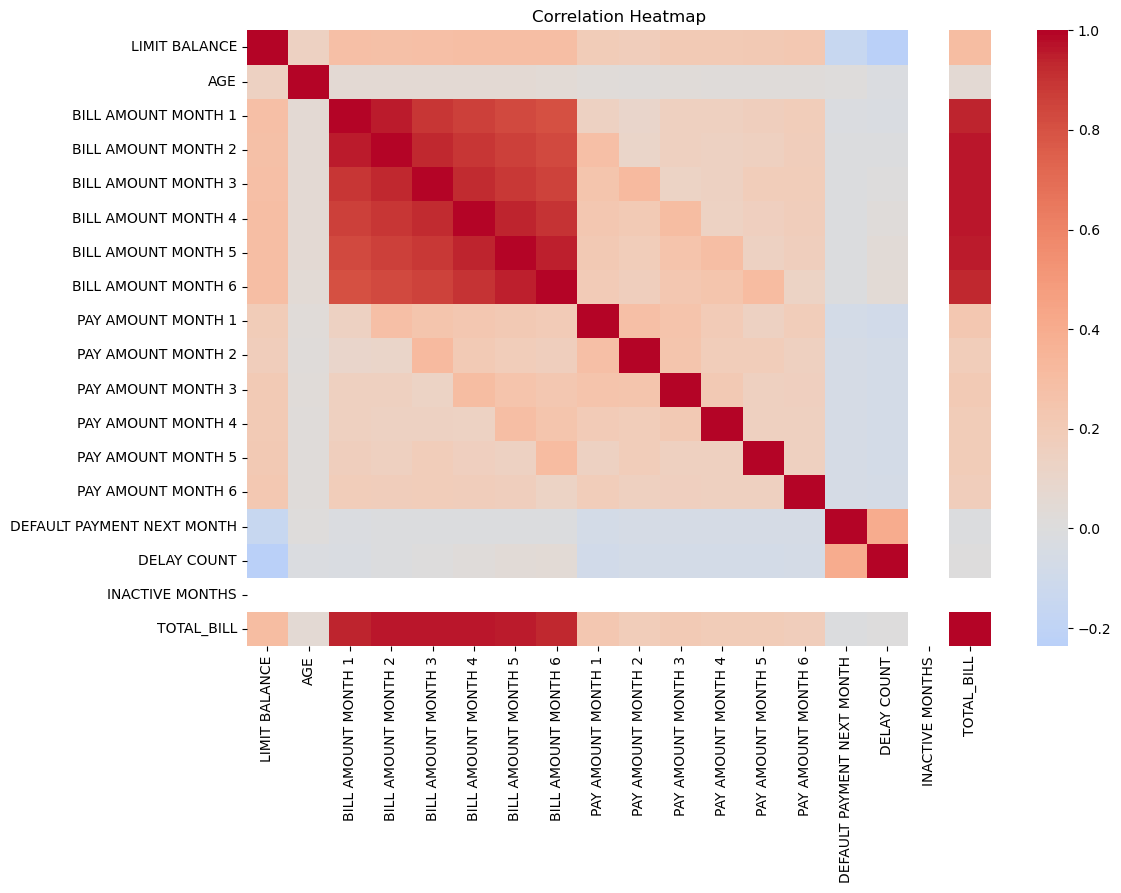

In [58]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(12,8))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Heatmap')
plt.show()


#### Machine Learning

In [45]:
df = pd.read_excel(
    "C:/Users/Administrator/Downloads/default+of+credit+card+clients/default of credit card clients.xlsx", skiprows=1, header=0, index_col=0)

In [46]:
df.columns = df.columns.str.upper()

In [47]:
# Payment columns
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Delay count
df['DELAY_COUNT'] = (df[pay_cols] > 0).sum(axis=1)

# Inactive months
df['INACTIVE_MONTHS'] = (df[pay_cols] == -2).sum(axis=1)

# Bills & payments
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

df['TOTAL_BILL'] = df[bill_cols].sum(axis=1)
df['TOTAL_PAY'] = df[pay_amt_cols].sum(axis=1)

df['PAYMENT_RATIO'] = df['TOTAL_PAY'] / (df['TOTAL_BILL'] + 1)
df['PAYMENT_RATIO'] = df['PAYMENT_RATIO'].clip(upper=5)


In [48]:
target = 'DEFAULT PAYMENT NEXT MONTH'

features = [
    'LIMIT_BAL','AGE','EDUCATION','MARRIAGE','SEX',
    'DELAY_COUNT','INACTIVE_MONTHS','TOTAL_BILL','TOTAL_PAY','PAYMENT_RATIO'
] + pay_cols

X = df[features]
y = df[target]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [51]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.66      0.29      0.40      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.62      0.64      6000
weighted avg       0.79      0.81      0.78      6000

ROC-AUC: 0.7378904386032671


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=300,
                       random_state=42)

In [53]:
rf_prob = rf.predict_proba(X_test)[:,1]
print('RF ROC-AUC:', roc_auc_score(y_test, rf_prob))


RF ROC-AUC: 0.7749508915476052


In [54]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importance.head(10)


DELAY_COUNT      0.246573
PAY_0            0.228881
PAY_2            0.098907
PAY_3            0.070760
TOTAL_PAY        0.068181
TOTAL_BILL       0.053513
PAYMENT_RATIO    0.050683
LIMIT_BAL        0.050508
PAY_4            0.040097
PAY_5            0.024711
dtype: float64